In [12]:
import pandas as pd
import numpy as np
import cv2
import random
import re
import os

#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [10]:
i=0
labelname = []
images = []
images_path = []
images_pixels = []
labels =[]

In [11]:
path = "./archive"
for directory in os.listdir(path):
    if not directory.startswith('.'):
        labelname.append(directory)
        for img in os.listdir(os.path.join(path,directory)):
            if len(re.findall('.png',img.lower())) != 0 or len(re.findall('.jpg',img.lower())) != 0 or len(re.findall('.jpeg',img.lower())) != 0:
                img_path = os.path.join(os.path.join(path,directory),img)
                images.append(img)
                images_path.append(img_path)
                img_pix = cv2.imread(img_path,1)
                images_pixels.append(cv2.resize(img_pix,(180,180)))
                labels.append(i)
        i= i+1

print("Total Labels: ", len(labels))
print("Total images: ", len(images))
print("Total output: ", len(labelname))
print("Total images_pixels: ", len(images_pixels))

Total Labels:  15644
Total images:  15644
Total output:  7
Total images_pixels:  15644


In [13]:
shuff = list(zip(images_pixels,labels))
random.shuffle(shuff)
pixel_data, labels_data = zip(*shuff)

In [17]:
X = np.array(pixel_data)
y = np.array(labels_data)

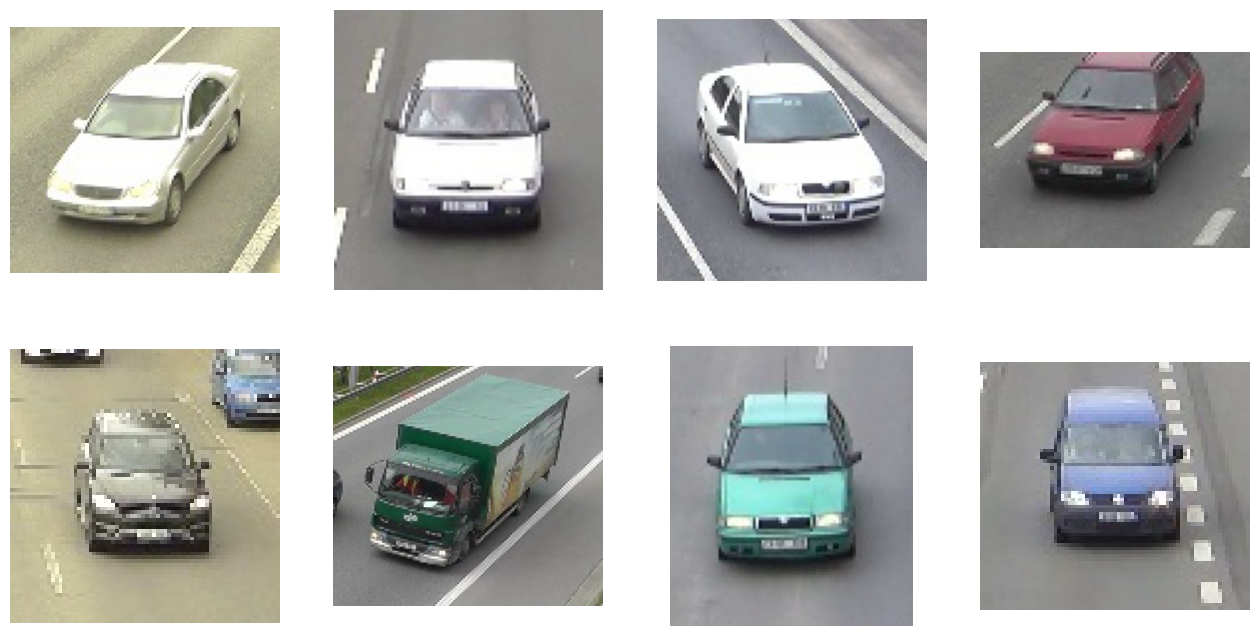

In [22]:
fig = plt.gcf()
fig.set_size_inches(16,8)

next_pix = images_path
random.shuffle(next_pix)

for i, img_path in enumerate(next_pix[0:8]):
    
    sp=plt.subplot(2,4,i+1)
    sp.axis('off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=123)

shape_dict = {
    "Data portion": ["X_train", "y_train", "X_test", "y_test"],
    "Shape": [X_train.shape, y_train.shape, X_test.shape, y_test.shape],
}

shape_df = pd.DataFrame(shape_dict)
shape_df

,Data portion,Shape
0,X_train,"(12515, 180, 180, 3)"
1,y_train,"(12515,)"
2,X_test,"(3129, 180, 180, 3)"
3,y_test,"(3129,)"


In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
predictor = model.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator)

Epoch 1/10
379/379 [==============================] - 78s 204ms/step - loss: 1.4118 - accuracy: 0.4328 - val_loss: 1.1205 - val_accuracy: 0.5424
Epoch 2/10
379/379 [==============================] - 63s 166ms/step - loss: 0.9416 - accuracy: 0.6219 - val_loss: 0.8584 - val_accuracy: 0.6752
Epoch 3/10
379/379 [==============================] - 66s 174ms/step - loss: 0.6761 - accuracy: 0.7415 - val_loss: 0.6686 - val_accuracy: 0.7467
Epoch 4/10
379/379 [==============================] - 60s 158ms/step - loss: 0.4898 - accuracy: 0.8164 - val_loss: 0.6032 - val_accuracy: 0.7752
Epoch 5/10
379/379 [==============================] - 59s 155ms/step - loss: 0.3550 - accuracy: 0.8643 - val_loss: 0.5507 - val_accuracy: 0.8007
Epoch 6/10
379/379 [==============================] - 55s 145ms/step - loss: 0.2556 - accuracy: 0.9083 - val_loss: 0.4903 - val_accuracy: 0.8364
Epoch 7/10
379/379 [==============================] - 62s 165ms/step - loss: 0.1847 - accuracy: 0.9331 - val_loss: 0.5793 - val_ac

In [9]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

17/17 [==============================] - 1s 66ms/step - loss: 0.7275 - accuracy: 0.8362
Test loss: 0.7275068759918213
Test accuracy: 0.8361904621124268


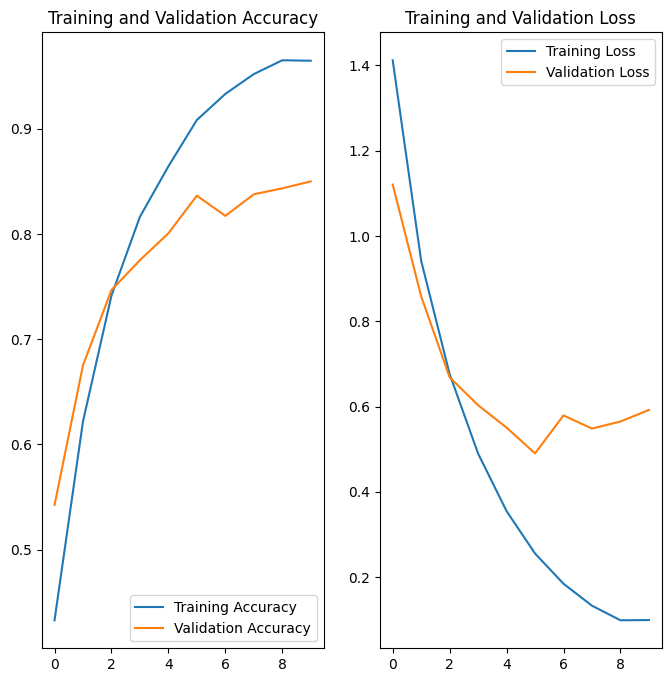

In [10]:
accuracy = predictor.history['accuracy']
val_accuracy = predictor.history['val_accuracy']

loss = predictor.history['loss']
val_loss = predictor.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
label_names = list(train_generator.class_indices.keys())
print("All class labels:", label_names)

All class labels: ['Big Truck', 'City Car', 'Multi Purpose Vehicle', 'Sedan', 'Sport Utility Vehicle', 'Truck', 'Van']


1/1 [==============================] - 0s 39ms/step
Actual Vehicle Type: Multi Purpose Vehicle
Predicted Vehicle Type: Multi Purpose Vehicle


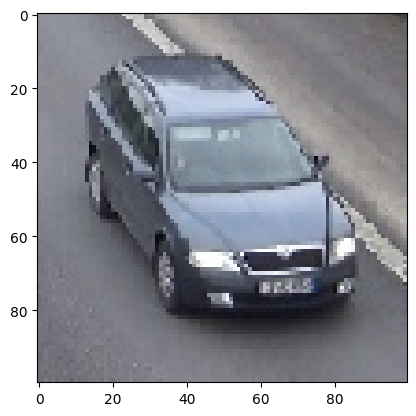

In [23]:
img_num = 31 # Change the number for getting a different vehicle
gen_num = 5


sample_img, sample_label = test_generator[gen_num]
prediction = model.predict(sample_img)
print("Actual Vehicle Type:", label_names[np.argmax(sample_label[img_num])])
predicted_class_index = np.argmax(prediction[img_num])
print("Predicted Vehicle Type:", label_names[predicted_class_index])

plt.imshow(sample_img[img_num])
plt.show()